## This notebook generates statistics from SFER_data and MBON sampling

In [1]:
# Load libraries and 'SFER_data.csv' table
import pandas as pd
import matplotlib.pyplot as plt

# Load SFER data table
sfer_data = pd.read_csv('~/plankton_imaging/SFER_data.csv')
print(sfer_data.head())

                             keyfield cruise_id  year  month  day   time  \
0      20140112_1323_WS14335_1_0_Surf   WS14335  2014     12    1  13:23   
1      20140112_1332_WS14335_2_0_Surf   WS14335  2014     12    1  13:32   
2      20140112_1353_WS14335_3_0_Surf   WS14335  2014     12    1  13:53   
3   20140112_1710_WS14335_EKIN_0_Surf   WS14335  2014     12    1  17:10   
4  20140112_1721_WS14335_EKMID_0_Surf   WS14335  2014     12    1  17:21   

              datetime  lat_deg  lat_min  lat_dec  ...  no3_flag   no2  \
0  2014-12-01 13:23:00       25  38.6984  25.6450  ...       NaN  0.04   
1  2014-12-01 13:32:00       25  38.4917  25.6415  ...       NaN  0.06   
2  2014-12-01 13:53:00       25  38.7510  25.6458  ...       NaN  0.07   
3  2014-12-01 17:10:00       25  20.0186  25.3336  ...       NaN  0.11   
4  2014-12-01 17:21:00       25  18.9835  25.3164  ...       NaN  0.07   

   no2_flag   si si_flag    chl chl_flag   pheo  pheo_flag  notes  
0       NaN  0.1     NaN  1.28

In [ ]:
# Create a table with a list of unique cruise_ids and some other useful stats
cruise_ids = sfer_data['cruise_id'].unique()
cruise_table = pd.DataFrame(cruise_ids, columns=['cruise_id'])
# Calculate statistics for each cruise using groupby and aggregation
stats = sfer_data.groupby('cruise_id').agg(
    year=('year', 'first'),
    month=('month', 'first'),
    num_c_stations=('station', lambda x: sfer_data.loc[x.index][sfer_data.loc[x.index]['station_type'] == 'C']['station'].nunique()),
    num_f_stations=('station', lambda x: sfer_data.loc[x.index][sfer_data.loc[x.index]['station_type'] == 'F']['station'].nunique()),
    c_surface_samples=('depth_class', lambda x: ((sfer_data.loc[x.index, 'station_type'] == 'C') & (x == 'Surface')).sum()),
    c_mid_samples=('depth_class', lambda x: ((sfer_data.loc[x.index, 'station_type'] == 'C') & (x == 'Mid')).sum()),
    c_bottom_samples=('depth_class', lambda x: ((sfer_data.loc[x.index, 'station_type'] == 'C') & (x == 'Bottom')).sum()),
    f_surface_samples=('depth_class', lambda x: ((sfer_data.loc[x.index, 'station_type'] == 'F') & (x == 'Surface')).sum()),
    f_mid_samples=('depth_class', lambda x: ((sfer_data.loc[x.index, 'station_type'] == 'F') & (x == 'Mid')).sum()),
    f_bottom_samples=('depth_class', lambda x: ((sfer_data.loc[x.index, 'station_type'] == 'F') & (x == 'Bottom')).sum()),
    chl_samples=('chl', 'count'),
    no3_no2_samples=('no3_no2', 'count')
).reset_index()

# Merge the calculated stats into the cruise_table
cruise_table = pd.merge(cruise_table, stats, on='cruise_id')
print(cruise_table.head(3))

# Print total number of unique cruise_ids and totals of stats above
print("Total unique cruise_ids:", cruise_table['cruise_id'].nunique())
print("Total C stations:", cruise_table['num_c_stations'].sum())
print("Total F stations:", cruise_table['num_f_stations'].sum())
print("Total C surface samples:", cruise_table['c_surface_samples'].sum())
print("Total C mid samples:", cruise_table['c_mid_samples'].sum())
print("Total C bottom samples:", cruise_table['c_bottom_samples'].sum())
print("Total chl samples:", cruise_table['chl_samples'].sum())
print("Total no3_no2 samples:", cruise_table['no3_no2_samples'].sum())

cruise_table.to_csv('cruise_table.tsv', sep='\t', index=False)

In [ ]:
# Create a bar plot showing the number of 'C' type stations sampled over time
# Filter for 'C' type stations
c_stations_data = sfer_data[sfer_data['station_type'] == 'C'].copy()

# Create a 'year_month' column for easier plotting over time
# We use zfill to ensure correct chronological sorting (e.g., '2014-01', '2014-02', etc.)
c_stations_data['year_month'] = c_stations_data['year'].astype(str) + '-' + c_stations_data['month'].astype(str).str.zfill(2)

# Group by 'year_month' and count the number of unique stations
monthly_c_stations = c_stations_data.groupby('year_month')['station'].nunique()

# Create the bar plot
plt.figure(figsize=(15, 6))
monthly_c_stations.plot(kind='bar')
plt.title("Number of 'CTD' Casts Sampled Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of CTD casts")
plt.xticks(rotation=90)
plt.tight_layout()

# Save the plot to a file
plt.savefig('c_stations_over_time.png')

plt.show()


In [ ]:
# Create a bar plot showing the number of 'F' type stations sampled over time
# Filter for 'F' type stations
f_stations_data = sfer_data[sfer_data['station_type'] == 'F'].copy()

# Create a 'year_month' column for easier plotting over time
f_stations_data['year_month'] = f_stations_data['year'].astype(str) + '-' + f_stations_data['month'].astype(str).str.zfill(2)

# Group by 'year_month' and count the number of unique stations
monthly_f_stations = f_stations_data.groupby('year_month')['station'].nunique()

# Create the bar plot
plt.figure(figsize=(15, 6))
monthly_f_stations.plot(kind='bar')
plt.title("Number of 'F' Stations Sampled Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of 'F' stations")
plt.xticks(rotation=90)
plt.tight_layout()

# Save the plot to a file
plt.savefig('f_stations_over_time.png')

plt.show()

In [ ]:
# Create a 'year_month' column if it doesn't exist
if 'year_month' not in sfer_data.columns:
    sfer_data['year_month'] = sfer_data['year'].astype(str) + '-' + sfer_data['month'].astype(str).str.zfill(2)

# Group by 'year_month' and 'depth_class', then count 'chl' samples
monthly_chl_samples_by_depth = sfer_data.groupby(['year_month', 'depth_class'])['chl'].count().unstack()

# Create the stacked bar plot
monthly_chl_samples_by_depth[['Surface', 'Mid', 'Bottom']].plot(kind='bar', stacked=True, figsize=(15, 7))

plt.title("Number of 'chl' Samples by Depth Class Collected Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of 'chl' samples")
plt.xticks(rotation=90)
plt.legend(title='Depth Class')
plt.tight_layout()

# Save the plot to a file
plt.savefig('chl_samples_by_depth_class.png')

plt.show()

In [ ]:
# Group by 'year_month' and 'depth_class', then count 'no3_no2' samples
monthly_no3_no2_samples_by_depth = sfer_data.groupby(['year_month', 'depth_class'])['no3_no2'].count().unstack()

# Create the stacked bar plot
monthly_no3_no2_samples_by_depth[['Surface', 'Mid', 'Bottom']].plot(kind='bar', stacked=True, figsize=(15, 7))

plt.title("Number of 'no3_no2' Samples by Depth Class Collected Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of 'no3_no2' samples")
plt.xticks(rotation=90)
plt.legend(title='Depth Class')
plt.tight_layout()

# Save the plot to a file
plt.savefig('no3_no2_samples_by_depth_class.png')

plt.show()

In [ ]:
# Define the time window for filtering
start_date = '2024-10'
end_date = '2025-08'

# Filter the 'chl' data for the specified time window
filtered_chl_data = monthly_chl_samples_by_depth[
    (monthly_chl_samples_by_depth.index >= start_date) & 
    (monthly_chl_samples_by_depth.index <= end_date)
]

# Create the stacked bar plot for 'chl' samples
filtered_chl_data[['Surface', 'Mid', 'Bottom']].plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title("Chl-a from SFER cruises (Oct 2024 - Aug 2025)", fontsize=18)
plt.xlabel("Year-Month", fontsize=18)
plt.ylabel("Number of samples", fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title='Depth Class', fontsize=18, title_fontsize=18)
plt.tight_layout()
plt.savefig('chl_samples_by_depth_class_2024-2025.png')
plt.show()

# Filter the 'no3_no2' data for the specified time window
filtered_no3_no2_data = monthly_no3_no2_samples_by_depth[
    (monthly_no3_no2_samples_by_depth.index >= start_date) & 
    (monthly_no3_no2_samples_by_depth.index <= end_date)
]

# Create the stacked bar plot for 'no3_no2' samples
filtered_no3_no2_data[['Surface', 'Mid', 'Bottom']].plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title("Nutrient samples from SFER cruises (Oct 2024 - Aug 2025)", fontsize=18)
plt.xlabel("Year-Month", fontsize=18)
plt.ylabel("Number of samples", fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title='Depth Class', fontsize=18, title_fontsize=18)
plt.tight_layout()
plt.savefig('no3_no2_samples_by_depth_class_2024-2025.png')
plt.show()

# Filter 'C' and 'F' station data for the specified time window
filtered_c_stations = monthly_c_stations[
    (monthly_c_stations.index >= start_date) & 
    (monthly_c_stations.index <= end_date)
]

filtered_f_stations = monthly_f_stations[
    (monthly_f_stations.index >= start_date) & 
    (monthly_f_stations.index <= end_date)
]

# Combine the filtered data into a single DataFrame
station_counts_df = pd.DataFrame({
    'C_Stations': filtered_c_stations,
    'F_Stations': filtered_f_stations
})

# Display the table
print("Number of 'C' and 'F' type stations sampled (Oct 2024 - Aug 2025):")
print(station_counts_df)

## This section is for eDNA samples

In [16]:
# Load EXPERIMENT metadata
mbon_data_experiment = pd.read_csv('FAIRe-NOAA_noaa-aoml-seusmbon - experimentRunMetadata.csv', header=2)

# Extract information from 'samp_name' into new columns
# The regex is designed to handle variations in the 'samp_name' format
mbon_data_experiment[['project', 'cruise_id', 'transect_id', 'station_id', 'depth_class', 'replicate']] = mbon_data_experiment['samp_name'].str.extract(
    r'^([^_]+)_([^_]+)_([^_]+)_([^_]+)_([^_]+)_([^_]+)$'
)

# Extract year and day-of-year from 'cruise_id'
# This handles cases where cruise_id might be NaN or not follow the expected pattern
temp_df = mbon_data_experiment['cruise_id'].str.extract(r'(\d{2})(\d{3})$', expand=True)
temp_df.rename(columns={0: 'year_short', 1: 'day_of_year'}, inplace=True)

# Convert to numeric, coercing errors to NaN
temp_df['year_short'] = pd.to_numeric(temp_df['year_short'], errors='coerce')
temp_df['day_of_year'] = pd.to_numeric(temp_df['day_of_year'], errors='coerce')

# Create a full year column
temp_df['year'] = 2000 + temp_df['year_short']

# Combine year and day_of_year to create a datetime object, handling NaNs
# Convert year and day_of_year to nullable integers to handle NaNs and remove decimals
temp_df['year'] = temp_df['year'].astype('Int64')
temp_df['day_of_year'] = temp_df['day_of_year'].astype('Int64')

# Create a date string 'YYYY-JJJ', this will produce 'nan-nan' for rows with NaNs
date_str = temp_df['year'].astype(str) + '-' + temp_df['day_of_year'].astype(str).str.zfill(3)

# Convert to datetime, invalid parsing (like 'nan-nan') will be set as NaT
datetime_col = pd.to_datetime(date_str, format='%Y-%j', errors='coerce')

# Assign new columns to the mbon_data DataFrame
mbon_data_experiment['year'] = datetime_col.dt.year
mbon_data_experiment['month'] = datetime_col.dt.month
mbon_data_experiment['day'] = datetime_col.dt.day

# Display the DataFrame with the new columns to verify the extraction
print(mbon_data_experiment[['samp_name', 'project', 'cruise_id', 'transect_id', 'station_id', 'depth_class', 'replicate', 'cruise_id', 'year', 'month', 'day']].head(5))


                         samp_name   project cruise_id transect_id station_id  \
0    SEUSMBON_WS22281_BG_BG2_Sur_C  SEUSMBON   WS22281          BG        BG2   
1    SEUSMBON_WS22281_RP_RP1_Sur_C  SEUSMBON   WS22281          RP        RP1   
2     SEUSMBON_WS22281_LK_LK_Sur_B  SEUSMBON   WS22281          LK         LK   
3  SEUSMBON_WS22281_CAL_CAL3_Sur_C  SEUSMBON   WS22281         CAL       CAL3   
4    SEUSMBON_WS22281_BG_BG2_Sur_A  SEUSMBON   WS22281          BG        BG2   

  depth_class replicate cruise_id    year  month  day  
0         Sur         C   WS22281  2022.0   10.0  8.0  
1         Sur         C   WS22281  2022.0   10.0  8.0  
2         Sur         B   WS22281  2022.0   10.0  8.0  
3         Sur         C   WS22281  2022.0   10.0  8.0  
4         Sur         A   WS22281  2022.0   10.0  8.0  


    cruise_id depth_class  unique_samp_name_count
0     FK15232         Bot                       9
1     FK15232         Sur                       9
2     FK15307         Bot                       9
3     FK15307         Sur                       9
4     FK15343         Bot                       9
..        ...         ...                     ...
119   WS24139         Sur                     141
120   WS24205         Bot                      23
121   WS24205         Mid                      12
122   WS24205        Mid2                       3
123   WS24205         Sur                     135

[124 rows x 3 columns]


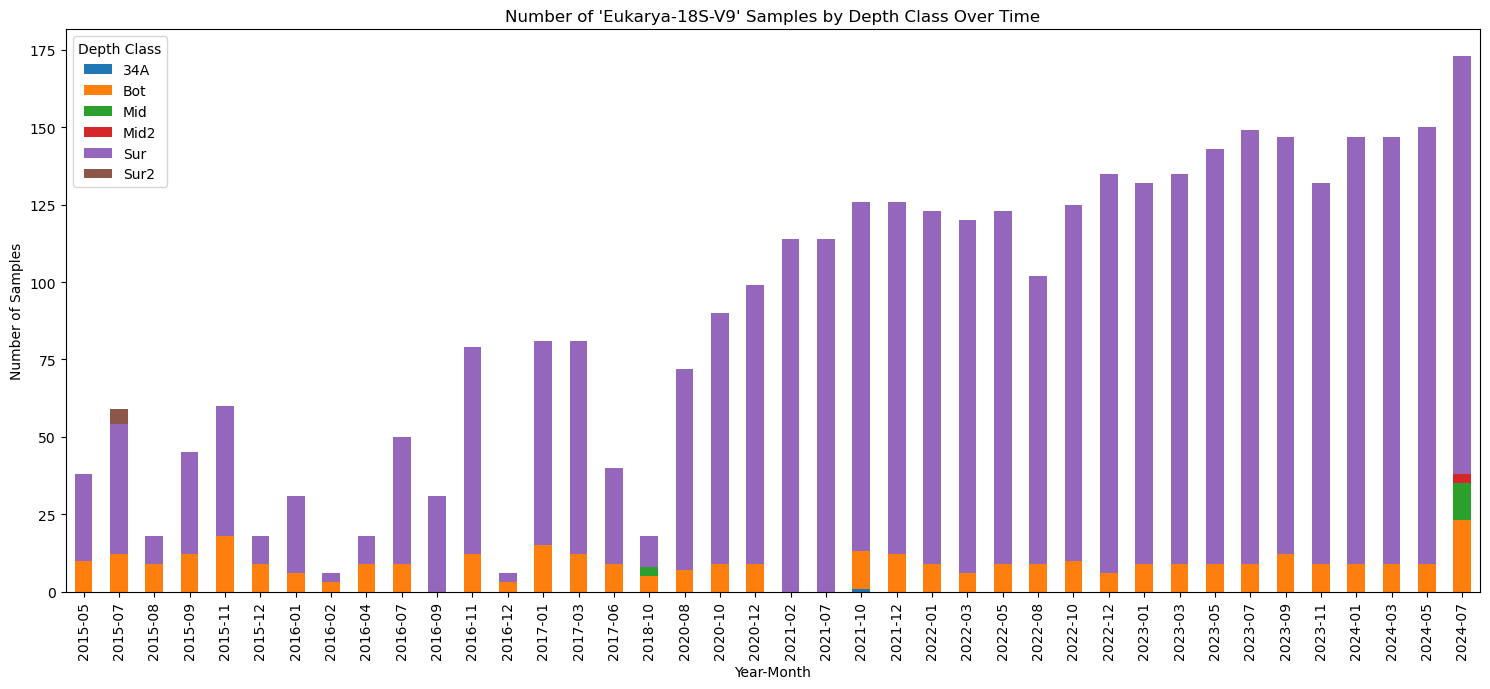

Total 'Eukarya-18S-V9' samples plotted: 3603


In [17]:
# Calculate the number of unique 'samp_name's for each 'cruise_id' and 'depth_class'
mbon_sample_stats = mbon_data_experiment.groupby(['cruise_id', 'depth_class'])['samp_name'].nunique().reset_index()

# Rename the column to be more descriptive
mbon_sample_stats.rename(columns={'samp_name': 'unique_samp_name_count'}, inplace=True)

# Display the resulting statistics
print(mbon_sample_stats)

# Filter for 'Eukarya-18S-V9-AmaralZettler' assay
euk_data = mbon_data_experiment[mbon_data_experiment['assay_name'] == 'Eukarya-18S-V9-AmaralZettler'].copy()

# Drop rows where year or month is NaN to ensure clean plotting
euk_data.dropna(subset=['year', 'month'], inplace=True)

# Convert year and month to integers
euk_data['year'] = euk_data['year'].astype(int)
euk_data['month'] = euk_data['month'].astype(int)

# Create a 'year_month' column for plotting over time
euk_data['year_month'] = euk_data['year'].astype(str) + '-' + euk_data['month'].astype(str).str.zfill(2)

# Group by 'year_month' and 'depth_class', then count the number of samples
monthly_euk_samples_by_depth = euk_data.groupby(['year_month', 'depth_class']).size().unstack(fill_value=0)

# Create the stacked bar plot
monthly_euk_samples_by_depth.plot(kind='bar', stacked=True, figsize=(15, 7))

plt.title("Number of 'Eukarya-18S-V9' Samples by Depth Class Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Samples")
plt.xticks(rotation=90)
plt.legend(title='Depth Class')
plt.tight_layout()

# Save the plot to a file
plt.savefig('eukarya_samples_by_depth_class.png')

plt.show()
# Print the total number of 'Eukarya-18S-V9' samples that were plotted
print(f"Total 'Eukarya-18S-V9' samples plotted: {monthly_euk_samples_by_depth.sum().sum()}")



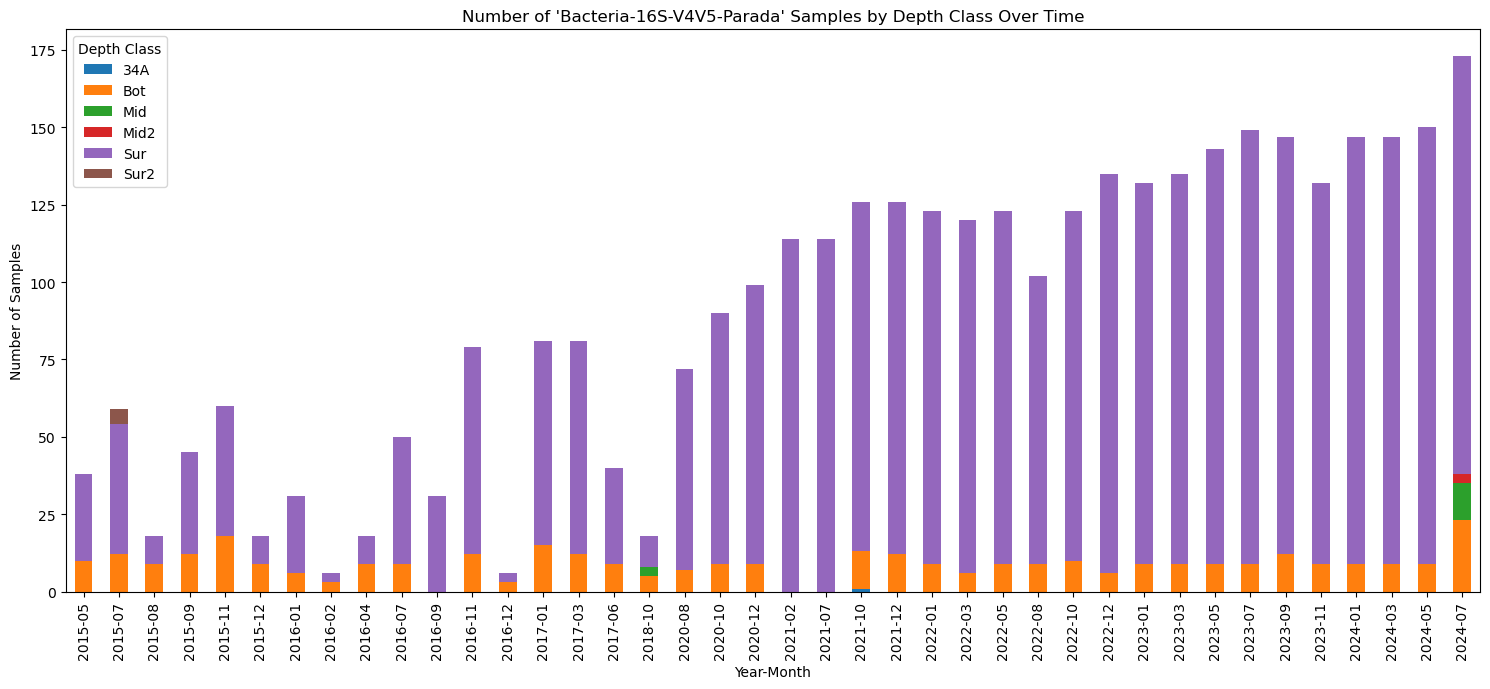

Total 'Bacteria-16S-V4V5-Parada' samples plotted: 3601


In [35]:
# Filter for 'Bacteria-16S-V4V5-Parada' assay
bac_data = mbon_data_experiment[mbon_data_experiment['assay_name'] == 'Bacteria-16S-V4V5-Parada'].copy()

# Drop rows where year or month is NaN to ensure clean plotting
bac_data.dropna(subset=['year', 'month'], inplace=True)

# Convert year and month to integers
bac_data['year'] = bac_data['year'].astype(int)
bac_data['month'] = bac_data['month'].astype(int)

# Create a 'year_month' column for plotting over time
bac_data['year_month'] = bac_data['year'].astype(str) + '-' + bac_data['month'].astype(str).str.zfill(2)

# Group by 'year_month' and 'depth_class', then count the number of samples
monthly_bac_samples_by_depth = bac_data.groupby(['year_month', 'depth_class']).size().unstack(fill_value=0)

# Create the stacked bar plot
monthly_bac_samples_by_depth.plot(kind='bar', stacked=True, figsize=(15, 7))

plt.title("Number of 'Bacteria-16S-V4V5-Parada' Samples by Depth Class Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Samples")
plt.xticks(rotation=90)
plt.legend(title='Depth Class')
plt.tight_layout()

# Save the plot to a file
plt.savefig('bacteria_samples_by_depth_class.png')

plt.show()

# Print the total number of 'Bacteria-16S-V4V5-Parada' samples that were plotted
print(f"Total 'Bacteria-16S-V4V5-Parada' samples plotted: {monthly_bac_samples_by_depth.sum().sum()}")

In [32]:
# Load SAMPLE metadata
mbon_data_sample = pd.read_csv('FAIRe-NOAA_noaa-aoml-seusmbon - sampleMetadata.csv', header=2)

# Filter metadata by 'samp_category' and 'extraction_status'
mbon_data_sample = mbon_data_sample[mbon_data_sample['samp_category'] == 'sample']
mbon_data_sample = mbon_data_sample[mbon_data_sample['extraction_status'] == 'extracted']

# Extract information from 'samp_name' into new columns
# The regex is designed to handle variations in the 'samp_name' format
mbon_data_sample[['project', 'cruise_id', 'transect_id', 'station_id', 'depth_class', 'replicate']] = mbon_data_sample['samp_name'].str.extract(
    r'^([^_]+)_([^_]+)_([^_]+)_([^_]+)_([^_]+)_([^_]+)$'
)

# Extract year and day-of-year from 'cruise_id'
# This handles cases where cruise_id might be NaN or not follow the expected pattern
temp_df2 = mbon_data_sample['cruise_id'].str.extract(r'(\d{2})(\d{3})$', expand=True)
temp_df2.rename(columns={0: 'year_short', 1: 'day_of_year'}, inplace=True)

# Convert to numeric, coercing errors to NaN
temp_df2['year_short'] = pd.to_numeric(temp_df2['year_short'], errors='coerce')
temp_df2['day_of_year'] = pd.to_numeric(temp_df2['day_of_year'], errors='coerce')

# Create a full year column
temp_df2['year'] = 2000 + temp_df2['year_short']

# Combine year and day_of_year to create a datetime object, handling NaNs
# Convert year and day_of_year to nullable integers to handle NaNs and remove decimals
temp_df2['year'] = temp_df2['year'].astype('Int64')
temp_df2['day_of_year'] = temp_df2['day_of_year'].astype('Int64')

# Create a date string 'YYYY-JJJ', this will produce 'nan-nan' for rows with NaNs
date_str = temp_df2['year'].astype(str) + '-' + temp_df2['day_of_year'].astype(str).str.zfill(3)

# Convert to datetime, invalid parsing (like 'nan-nan') will be set as NaT
datetime_col = pd.to_datetime(date_str, format='%Y-%j', errors='coerce')

# Assign new columns to the mbon_data DataFrame
mbon_data_sample['year'] = datetime_col.dt.year
mbon_data_sample['month'] = datetime_col.dt.month
mbon_data_sample['day'] = datetime_col.dt.day

# Display the DataFrame with the new columns to verify the extraction
print(mbon_data_sample[['samp_name', 'project', 'cruise_id', 'transect_id', 'station_id', 'depth_class', 'replicate', 'cruise_id', 'year', 'month', 'day']].head(5))


                       samp_name   project cruise_id transect_id station_id  \
43  SEUSMBON_FK15232_LK_LK_Bot_A  SEUSMBON   FK15232          LK         LK   
44  SEUSMBON_FK15232_LK_LK_Bot_B  SEUSMBON   FK15232          LK         LK   
45  SEUSMBON_FK15232_LK_LK_Bot_C  SEUSMBON   FK15232          LK         LK   
46  SEUSMBON_FK15232_LK_LK_Sur_A  SEUSMBON   FK15232          LK         LK   
47  SEUSMBON_FK15232_LK_LK_Sur_B  SEUSMBON   FK15232          LK         LK   

   depth_class replicate cruise_id    year  month   day  
43         Bot         A   FK15232  2015.0    8.0  20.0  
44         Bot         B   FK15232  2015.0    8.0  20.0  
45         Bot         C   FK15232  2015.0    8.0  20.0  
46         Sur         A   FK15232  2015.0    8.0  20.0  
47         Sur         B   FK15232  2015.0    8.0  20.0  


/tmp/ipykernel_1381131/1341369203.py:2: DtypeWarning: Columns (13,14,53,70,72,73,75) have mixed types. Specify dtype option on import or set low_memory=False.
  mbon_data_sample = pd.read_csv('FAIRe-NOAA_noaa-aoml-seusmbon - sampleMetadata.csv', header=2)


<Figure size 1500x700 with 0 Axes>

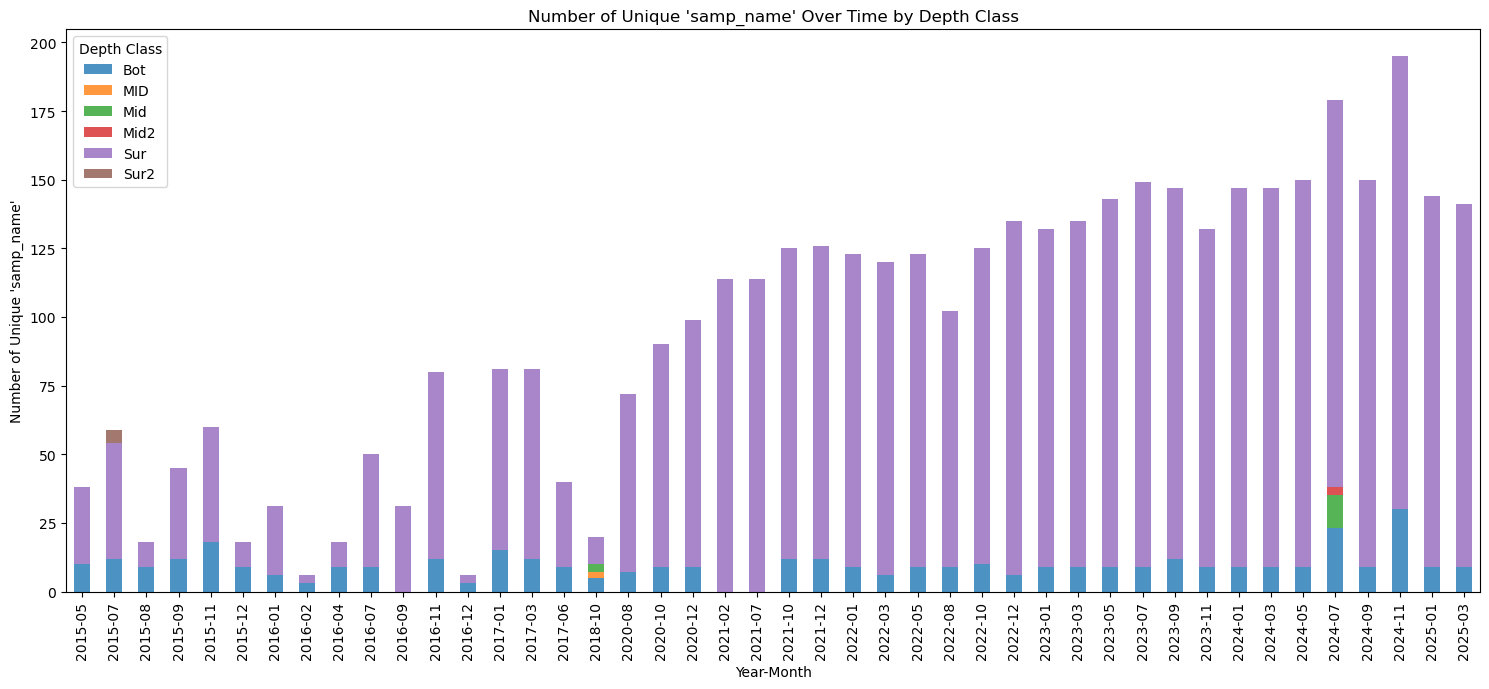

Total unique 'samp_name' plotted: 4241


In [33]:
# Plot the data from the previous cell

# Ensure 'year' and 'month' columns are integers
mbon_data_sample = mbon_data_sample.dropna(subset=['year', 'month'])
mbon_data_sample['year'] = mbon_data_sample['year'].astype(int)
mbon_data_sample['month'] = mbon_data_sample['month'].astype(int)

# Create a 'year_month' column for grouping
mbon_data_sample['year_month'] = mbon_data_sample['year'].astype(str) + '-' + mbon_data_sample['month'].astype(str).str.zfill(2)

# Group by 'year_month' and 'depth_class', and count unique 'samp_name'
stackplot_data = mbon_data_sample.groupby(['year_month', 'depth_class'])['samp_name'].nunique().unstack(fill_value=0)

# Create the stacked bar plot
plt.figure(figsize=(15, 7))
stackplot_data.plot(kind='bar', stacked=True, figsize=(15, 7), alpha=0.8)

plt.title("Number of Unique 'samp_name' Over Time by Depth Class")
plt.xlabel("Year-Month")
plt.ylabel("Number of Unique 'samp_name'")
plt.xticks(rotation=90)
plt.legend(title='Depth Class')
plt.tight_layout()

# Save the plot to a file
plt.savefig('unique_samp_name_stackplot.png')

plt.show()# Print the total number of 'Eukarya-18S-V9' samples that were plotted
print(f"Total unique 'samp_name' plotted: {stackplot_data.sum().sum()}")

In [34]:
# Find the number of samples not sequences as unique 'samp_name' in 'mbon_data_sample' 
# not present in 'mbon_data_experiment'
unique_sample_names = set(mbon_data_sample['samp_name'].unique())
unique_experiment_names = set(mbon_data_experiment['samp_name'].unique())

# Calculate the difference
sample_not_in_experiment = unique_sample_names - unique_experiment_names

# Create a DataFrame to display the results
difference_table = pd.DataFrame({'samp_name': list(sample_not_in_experiment)})

# Print the number of unique 'samp_name' in the difference
print(f"Number of samples not sequenced (not in 'mbon_data_experiment'): {len(sample_not_in_experiment)}")

# Display the difference table
print(difference_table)

Number of samples not sequenced (not in 'mbon_data_experiment'): 639
                           samp_name
0    SEUSMBON_WS24258_CAL_CAL1_Sur_A
1    SEUSMBON_WS24258_AMI_AMI2_Sur_A
2     SEUSMBON_WS25024_SR_57.3_Sur_B
3    SEUSMBON_WS24258_CAL_CAL6_Sur_B
4      SEUSMBON_WS24314_AC_AC4_Sur_C
..                               ...
634    SEUSMBON_WS24314_BG_BG2_Sur_A
635      SEUSMBON_WS24258_V_V5_Sur_C
636     SEUSMBON_WS24314_L _L9_Sur_B
637     SEUSMBON_WS25024_MC_60_Sur_B
638    SEUSMBON_WS24314_KWS_30_Sur_A

[639 rows x 1 columns]
